# Gold and NIFTY 50 Analysis

This notebook analyzes the relationship between gold prices and NIFTY 50 index.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
plt.style.use('seaborn')
sns.set_palette('husl')

C:\Users\Genesis\AppData\Local\Temp\ipykernel_4468\3737884910.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## 1. Loading and Preparing Data

In [14]:
# Load the datasets
gold_df = pd.read_csv('gold_data.csv')
nifty_df = pd.read_csv('nifty_data.csv')

# Display basic information about the datasets
print("Gold Data Info:")
print(gold_df.info())
print("\nNIFTY Data Info:")
print(nifty_df.info())
# # Clean column names (remove extra spaces)
# nifty_df.columns = nifty_df.columns.str.strip()

Gold Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804 entries, 0 to 1803
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1804 non-null   object 
 1   Price   1804 non-null   float64
 2   Open    1804 non-null   float64
 3   High    1804 non-null   float64
 4   Low     1804 non-null   float64
 5   Volume  1804 non-null   float64
dtypes: float64(5), object(1)
memory usage: 84.7+ KB
None

NIFTY Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1486 non-null   object 
 1   Open             1486 non-null   float64
 2   High             1486 non-null   float64
 3   Low              1486 non-null   float64
 4   Close            1486 non-null   float64
 5   Shares Traded    1485 non-null   float64
 6   Turnover (₹ Cr)  1485 non-n

## 2. Standardizing Date Formats

In [16]:
# Convert date columns to datetime
gold_df['Date'] = pd.to_datetime(gold_df.Date, format='%d/%m/%Y')
nifty_df['Date '] = pd.to_datetime(nifty_df['Date '], format='%d-%b-%Y')

# Sort both dataframes by date
gold_df = gold_df.sort_values('Date')
nifty_df = nifty_df.sort_values('Date ')

# Display the date ranges
print(f"Gold data date range: {gold_df['Date'].min()} to {gold_df['Date'].max()}")
print(f"NIFTY data date range: {nifty_df['Date '].min()} to {nifty_df['Date '].max()}")

Gold data date range: 2015-09-29 00:00:00 to 2022-07-22 00:00:00
NIFTY data date range: 2016-04-01 00:00:00 to 2022-03-31 00:00:00


In [17]:
nifty_df = nifty_df.rename(columns={'Date ': 'Date'})
nifty_df = nifty_df.rename(columns={'Close ': 'Close'})


## 3. Merging the Datasets

In [18]:
# Merge the datasets on date
merged_df = pd.merge(gold_df, nifty_df, on='Date', how='inner')

# Display the merged dataset
print(f"Number of common trading days: {len(merged_df)}")
merged_df.head()

Number of common trading days: 1482


,Date,Price,Open,High,Low,Volume,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,2016-04-01,1222.8,1233.4,1236.2,1209.9,2.66,7718.05,7740.15,7666.10,7713.05,189571551.0,8118.47
1,2016-04-04,1218.6,1222.1,1223.2,1215.5,1.61,7733.15,7764.45,7704.40,7758.80,160277940.0,6506.44
2,2016-04-05,1228.9,1216.3,1237.8,1215.7,1.25,7736.30,7736.30,7588.65,7603.20,210126897.0,8412.34
3,2016-04-06,1223.0,1232.4,1233.0,1217.0,1.78,7636.05,7638.65,7591.75,7614.35,170653808.0,6802.69
4,2016-04-07,1236.7,1223.7,1244.1,1223.6,1.65,7630.40,7630.75,7535.85,7546.45,241684050.0,7709.23


## 4. Basic Statistical Analysis

Correlation between Gold Price and NIFTY 50:
         Price    Close
Price  1.00000  0.72037
Close  0.72037  1.00000


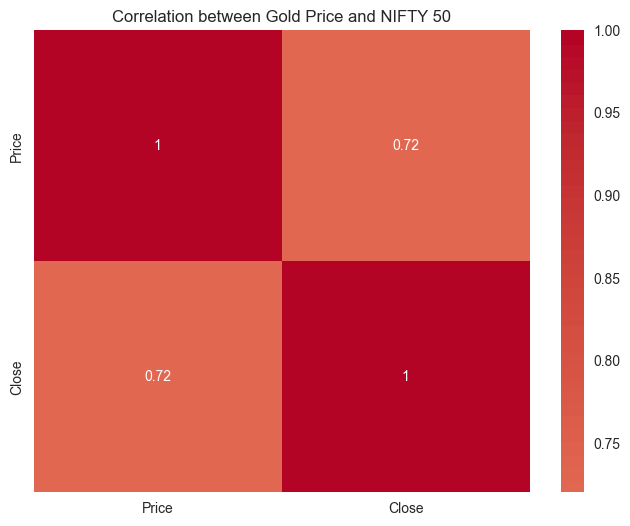

In [41]:
# Calculate correlation matrix
correlation_matrix = merged_df[['Price', 'Close']].corr()
print("Correlation between Gold Price and NIFTY 50:")
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Gold Price and NIFTY 50')
plt.show()

## 5. Time Series Visualization

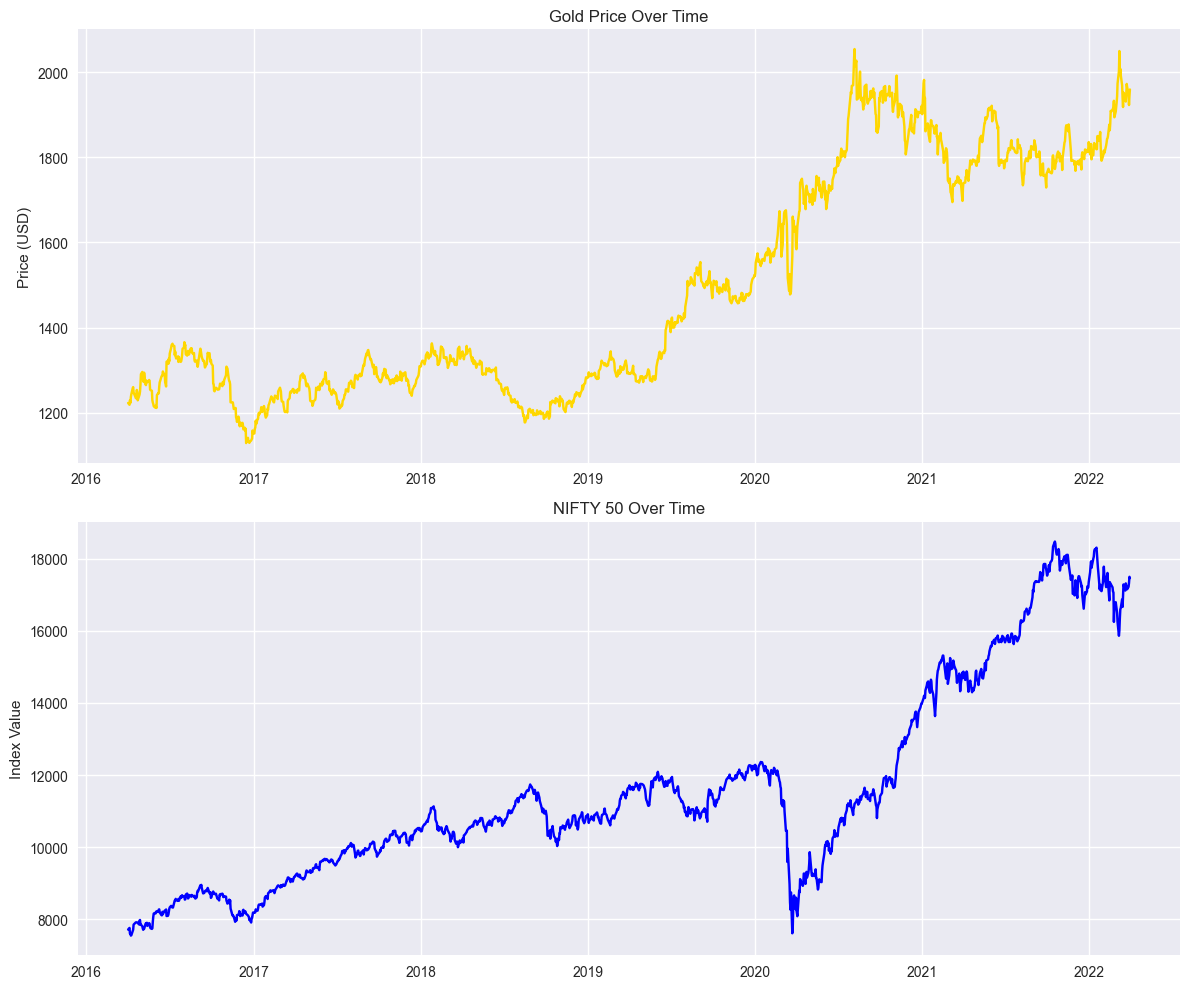

In [42]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot Gold Price
ax1.plot(merged_df['Date'], merged_df['Price'], color='gold')
ax1.set_title('Gold Price Over Time')
ax1.set_ylabel('Price (USD)')
ax1.grid(True)

# Plot NIFTY 50
ax2.plot(merged_df['Date'], merged_df['Close'], color='blue')
ax2.set_title('NIFTY 50 Over Time')
ax2.set_ylabel('Index Value')
ax2.grid(True)

plt.tight_layout()
plt.show()

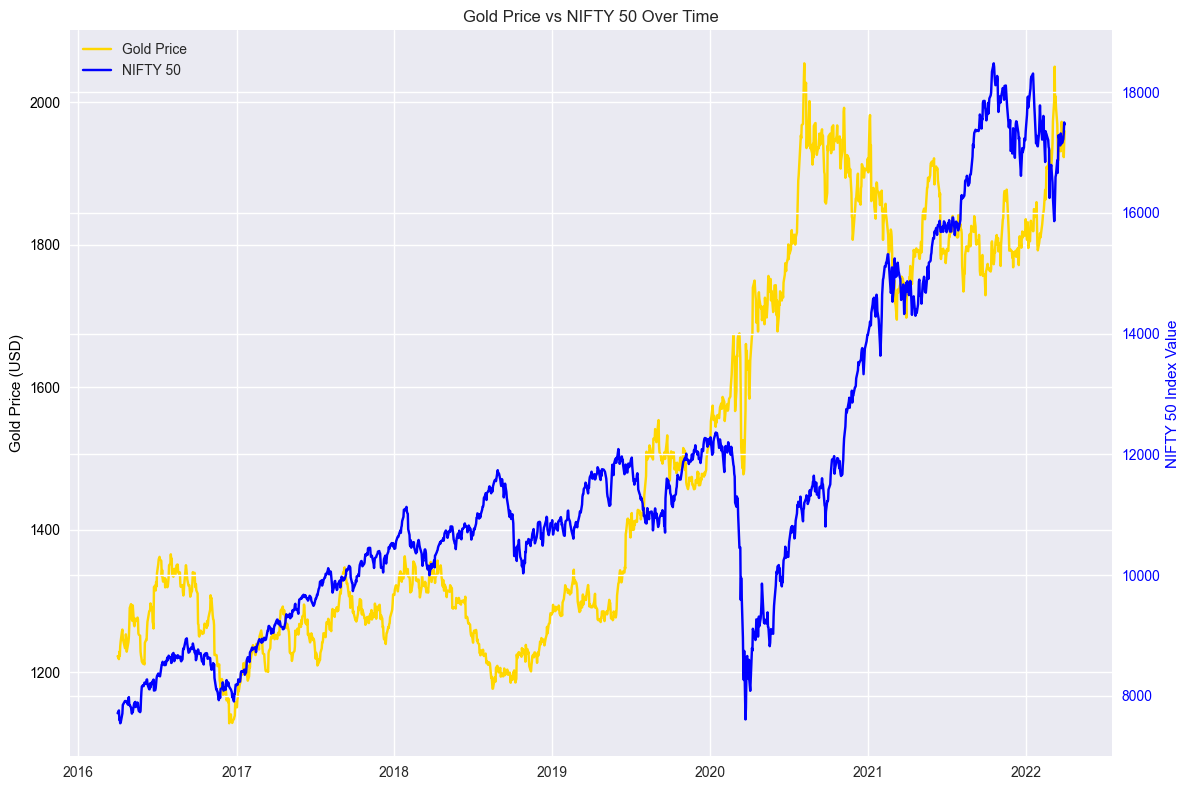

In [45]:
# Create a single figure
plt.figure(figsize=(12, 8))

# Create two y-axes
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot Gold Price on left y-axis
line1 = ax1.plot(merged_df['Date'], merged_df['Price'], color='gold', label='Gold Price')
ax1.set_ylabel('Gold Price (USD)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Plot NIFTY 50 on right y-axis  
line2 = ax2.plot(merged_df['Date'], merged_df['Close'], color='blue', label='NIFTY 50')
ax2.set_ylabel('NIFTY 50 Index Value', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add title and grid
plt.title('Gold Price vs NIFTY 50 Over Time')
ax1.grid(True)

# Add legend
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()


## 6. Returns Analysis

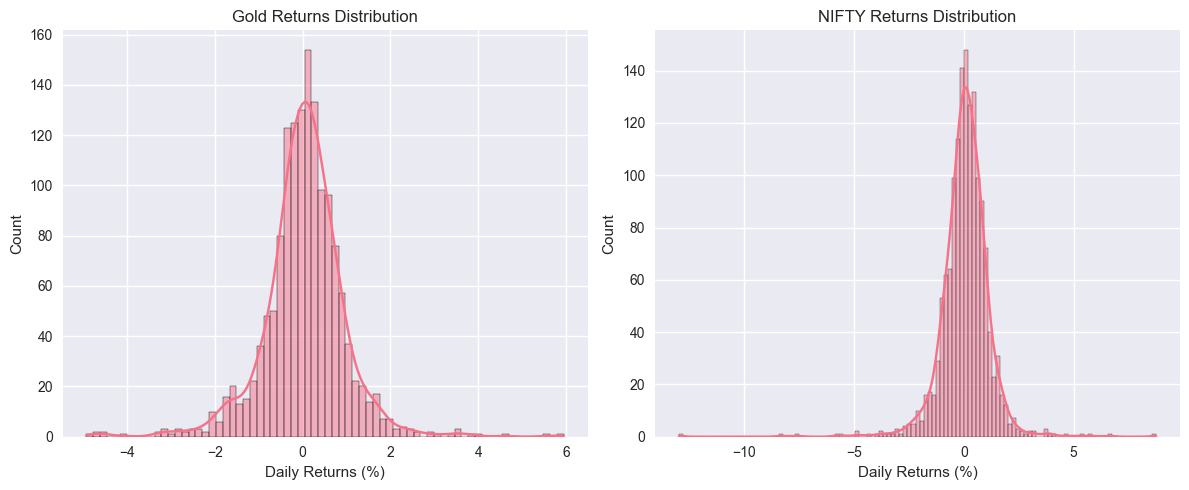

In [46]:
# Calculate daily returns
merged_df['Gold_Returns'] = merged_df['Price'].pct_change() * 100
merged_df['NIFTY_Returns'] = merged_df['Close'].pct_change() * 100

# Plot returns distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(merged_df['Gold_Returns'].dropna(), kde=True)
plt.title('Gold Returns Distribution')
plt.xlabel('Daily Returns (%)')

plt.subplot(1, 2, 2)
sns.histplot(merged_df['NIFTY_Returns'].dropna(), kde=True)
plt.title('NIFTY Returns Distribution')
plt.xlabel('Daily Returns (%)')

plt.tight_layout()
plt.show()

## 7. Rolling Correlation Analysis

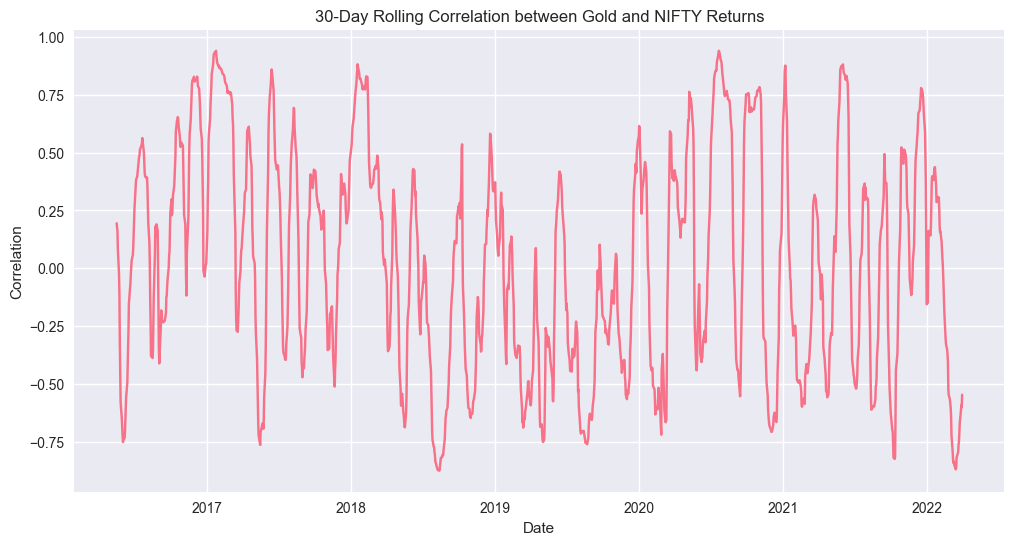

In [52]:
# Calculate rolling correlation (30-day window)
rolling_corr = merged_df['Close'].rolling(window=30).corr(merged_df['Price'])

# Plot rolling correlation
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], rolling_corr)
plt.title('30-Day Rolling Correlation between Gold and NIFTY Returns')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

## 8. Advanced Statistical Analysis

Let's perform more sophisticated statistical analysis to understand the relationship between Gold prices and NIFTY 50.

In [53]:
# Calculate descriptive statistics for both assets
print("Descriptive Statistics for Gold:")
print(merged_df[['Price', 'Gold_Returns']].describe())
print("\nDescriptive Statistics for NIFTY 50:")
print(merged_df[['Close', 'NIFTY_Returns']].describe())

# Calculate risk metrics
gold_volatility = merged_df['Gold_Returns'].std()
nifty_volatility = merged_df['NIFTY_Returns'].std()

print("\nAnnualized Volatility (assuming 252 trading days):")
print(f"Gold: {gold_volatility * np.sqrt(252):.2f}%")
print(f"NIFTY 50: {nifty_volatility * np.sqrt(252):.2f}%")

Descriptive Statistics for Gold:
             Price  Gold_Returns
count  1482.000000   1481.000000
mean   1490.914460      0.036194
std     264.181695      0.932663
min    1128.600000     -4.929224
25%    1272.425000     -0.374560
50%    1339.950000      0.058441
75%    1783.325000      0.516893
max    2054.600000      5.945394

Descriptive Statistics for NIFTY 50:
              Close  NIFTY_Returns
count   1482.000000    1481.000000
mean   11583.280229       0.061620
std     2748.704922       1.127702
min     7546.450000     -12.980464
25%     9794.625000      -0.419848
50%    10889.550000       0.084575
75%    12161.537500       0.628159
max    18477.050000       8.763205

Annualized Volatility (assuming 252 trading days):
Gold: 14.81%
NIFTY 50: 17.90%


## 9. Granger Causality Test

Let's test if changes in one asset can predict changes in the other.

In [56]:
merged_df.head()

,Date,Price,Open,High,Low,Volume,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),Gold_Returns,NIFTY_Returns
0,2016-04-01,1222.8,1233.4,1236.2,1209.9,2.66,7718.05,7740.15,7666.10,7713.05,189571551.0,8118.47,NaN,NaN
1,2016-04-04,1218.6,1222.1,1223.2,1215.5,1.61,7733.15,7764.45,7704.40,7758.80,160277940.0,6506.44,-0.343474,0.593151
2,2016-04-05,1228.9,1216.3,1237.8,1215.7,1.25,7736.30,7736.30,7588.65,7603.20,210126897.0,8412.34,0.845232,-2.005465
3,2016-04-06,1223.0,1232.4,1233.0,1217.0,1.78,7636.05,7638.65,7591.75,7614.35,170653808.0,6802.69,-0.480104,0.146649
4,2016-04-07,1236.7,1223.7,1244.1,1223.6,1.65,7630.40,7630.75,7535.85,7546.45,241684050.0,7709.23,1.120196,-0.891737


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

def perform_granger_causality(data, maxlag=5):
    print("\nGranger Causality Test Results:")
    print("H0: First variable does NOT Granger-cause second variable")
    
    # Test if Gold Granger-causes NIFTY
    print("\nTesting if Gold returns Granger-cause NIFTY returns:")
    gc_gold_nifty = grangercausalitytests(data[['Gold_Returns', 'NIFTY_Returns']].dropna(), maxlag=maxlag, verbose=False)
    
    # Test if NIFTY Granger-causes Gold
    print("\nTesting if NIFTY returns Granger-cause Gold returns:")
    gc_nifty_gold = grangercausalitytests(data[['NIFTY_Returns', 'Gold_Returns']].dropna(), maxlag=maxlag, verbose=False)
     
    # Print results
    for lag in range(1, maxlag + 1):
        print(f"\nLag {lag}:")
        print(f"Gold → NIFTY p-value: {gc_gold_nifty[lag][0]['ssr_chi2test'][1]:.4f}")
        print(f"NIFTY → Gold p-value: {gc_nifty_gold[lag][0]['ssr_chi2test'][1]:.4f}")

perform_granger_causality(merged_df)


Granger Causality Test Results:
H0: First variable does NOT Granger-cause second variable

Testing if Gold returns Granger-cause NIFTY returns:

Testing if NIFTY returns Granger-cause Gold returns:

Lag 1:
Gold → NIFTY p-value: 0.6544
NIFTY → Gold p-value: 0.0000

Lag 2:
Gold → NIFTY p-value: 0.0006
NIFTY → Gold p-value: 0.0001

Lag 3:
Gold → NIFTY p-value: 0.0000
NIFTY → Gold p-value: 0.0000

Lag 4:
Gold → NIFTY p-value: 0.0001
NIFTY → Gold p-value: 0.0000

Lag 5:
Gold → NIFTY p-value: 0.0000
NIFTY → Gold p-value: 0.0000


c:\Users\Genesis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\Genesis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


## 10. Regime Analysis

Let's analyze how the relationship between Gold and NIFTY changes in different market conditions.

Correlation in different market regimes:
Market_Regime
Bear      -0.059400
Bull       0.006031
Neutral    0.002397
dtype: float64


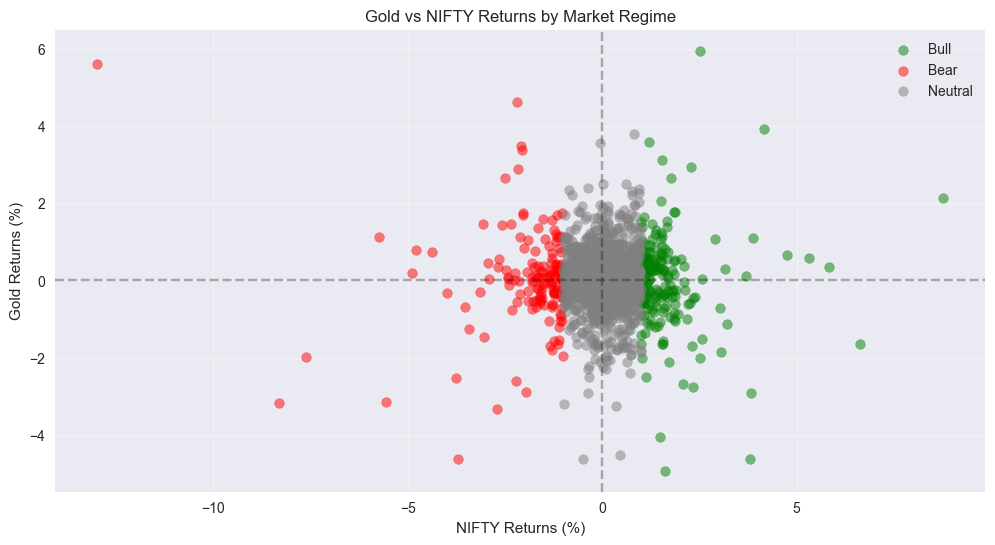

In [57]:
# Define market regimes based on NIFTY returns
def classify_regime(returns):
    if returns <= -1:  # Bear market (daily loss > 1%)
        return 'Bear'
    elif returns >= 1:  # Bull market (daily gain > 1%)
        return 'Bull'
    else:  # Neutral market
        return 'Neutral'

# Create market regime column
merged_df['Market_Regime'] = merged_df['NIFTY_Returns'].apply(classify_regime)

# Calculate correlation in different regimes
regime_correlations = merged_df.groupby('Market_Regime').apply(
    lambda x: x['Gold_Returns'].corr(x['NIFTY_Returns'])
)

print("Correlation in different market regimes:")
print(regime_correlations)

# Visualize returns in different regimes
plt.figure(figsize=(12, 6))
colors = {'Bull': 'green', 'Bear': 'red', 'Neutral': 'gray'}

for regime in ['Bull', 'Bear', 'Neutral']:
    mask = merged_df['Market_Regime'] == regime
    plt.scatter(
        merged_df.loc[mask, 'NIFTY_Returns'],
        merged_df.loc[mask, 'Gold_Returns'],
        c=colors[regime],
        alpha=0.5,
        label=regime
    )

plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.3)
plt.xlabel('NIFTY Returns (%)')
plt.ylabel('Gold Returns (%)')
plt.title('Gold vs NIFTY Returns by Market Regime')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 11. Risk-Adjusted Performance Metrics

In [58]:
# Calculate risk-adjusted performance metrics
def calculate_risk_metrics(returns, risk_free_rate=0.05):  # assuming 5% risk-free rate
    # Annualized return
    ann_return = returns.mean() * 252
    
    # Annualized volatility
    ann_vol = returns.std() * np.sqrt(252)
    
    # Sharpe Ratio
    sharpe = (ann_return - risk_free_rate) / ann_vol
    
    # Maximum Drawdown
    cum_returns = (1 + returns/100).cumprod()
    rolling_max = cum_returns.expanding().max()
    drawdowns = (cum_returns - rolling_max) / rolling_max
    max_drawdown = drawdowns.min()
    
    return pd.Series({
        'Annualized Return (%)': ann_return,
        'Annualized Volatility (%)': ann_vol,
        'Sharpe Ratio': sharpe,
        'Maximum Drawdown (%)': max_drawdown * 100
    })

# Calculate metrics for both assets
gold_metrics = calculate_risk_metrics(merged_df['Gold_Returns'])
nifty_metrics = calculate_risk_metrics(merged_df['NIFTY_Returns'])

metrics_df = pd.DataFrame({
    'Gold': gold_metrics,
    'NIFTY 50': nifty_metrics
})

print("Risk-Adjusted Performance Metrics:")
print(metrics_df)

Risk-Adjusted Performance Metrics:
                                Gold   NIFTY 50
Annualized Return (%)       9.120928  15.528151
Annualized Volatility (%)  14.805558  17.901721
Sharpe Ratio                0.612670   0.864618
Maximum Drawdown (%)      -17.507057 -38.439853


## 12. Cross-Asset Lead-Lag Analysis

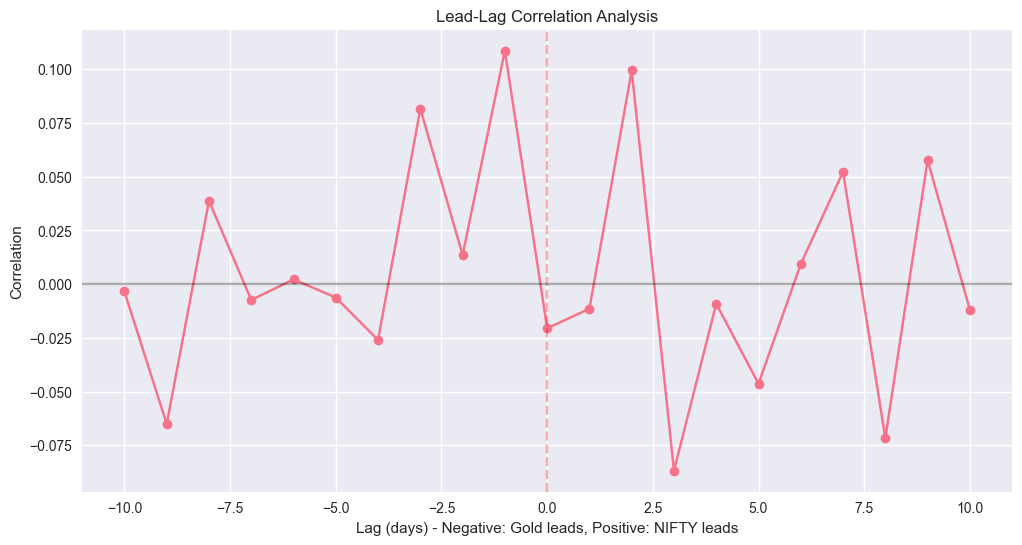

In [59]:
def calculate_lead_lag_correlation(df, max_lags=10):
    correlations = []
    lags = range(-max_lags, max_lags + 1)
    
    for lag in lags:
        if lag < 0:
            correlation = df['Gold_Returns'].shift(-lag).corr(df['NIFTY_Returns'])
        else:
            correlation = df['Gold_Returns'].corr(df['NIFTY_Returns'].shift(lag))
        correlations.append(correlation)
    
    plt.figure(figsize=(12, 6))
    plt.plot(lags, correlations, marker='o')
    plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.title('Lead-Lag Correlation Analysis')
    plt.xlabel('Lag (days) - Negative: Gold leads, Positive: NIFTY leads')
    plt.ylabel('Correlation')
    plt.grid(True)
    plt.show()

calculate_lead_lag_correlation(merged_df)